# Fit beta distributions to the simulations
This will require monitoring and quality control and thus an interactive approach

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import h5py

import os, sys
rootpath = os.path.join(os.getcwd(), '.')
sys.path.append(rootpath)
from src.analysis import *
# reimport modules if they change
%load_ext autoreload
%autoreload 2

In [2]:
file_beta = './dat/beta_approximation_simulation.h5'
# make directory if not exist
if not os.path.exists('./dat'):
    os.makedirs('./dat')
# TODO: API is not really human readable yet. Maybe a database/dataframe would be more appropriate? Maybe SQLlite?

In [3]:
params = {
    'N': int(1e4),
    'K': 100,
    'mu': 0.02
}
root='/scratch02.local/johannes/projects/sahel_finite-observation-dynamic-range/N={N}_K={K}/'.format(**params)
print("system setup:",root)

# get lambda values by iterating over directory and splitting on '='
lambda_dirs = os.listdir(root)
lambdas = [1-float(dir.split("=")[-1]) for dir in  lambda_dirs]
print("available lambda values:")
print(lambdas)

system setup: /scratch02.local/johannes/projects/sahel_finite-observation-dynamic-range/N=10000_K=100/
available lambda values:
[0.999, 0.8220000000000001, 0.99684, 0.999438, 0.999684, 0.99438, 0.9999, 0.9822, 0.9438, 0.9684, 0.99, 0.0, 0.43799999999999994, 0.999822, 0.99822, 0.6839999999999999, 0.9]


## Select a lambda for supervised analysis

In [10]:
i = 11
print("loading data for lambda={}".format(lambdas[i]))
path=root+lambda_dirs[i]
filenames=os.listdir(path)
hs = [float(filename.split("_")[-2].split("=")[-1]) for filename in filenames]
# sort filenames and h by h
hs, filenames = zip(*sorted(zip(hs, filenames)))
print("path:", path)
# print filenames as a list
print(f"files ({len(filenames)}):")
for (h, filename) in zip(hs, filenames):
    print(f'{h:.2e}\t {filename}')

loading data for lambda=0.0
path: /scratch02.local/johannes/projects/sahel_finite-observation-dynamic-range/N=10000_K=100/1-lambda=1.00e+00
files (51):
1.00e-04	 simulation_mu=0.20_h=1.00e-04_seed=1000.h5
1.26e-04	 simulation_mu=0.20_h=1.26e-04_seed=1000.h5
1.58e-04	 simulation_mu=0.20_h=1.58e-04_seed=1000.h5
2.00e-04	 simulation_mu=0.20_h=2.00e-04_seed=1000.h5
2.51e-04	 simulation_mu=0.20_h=2.51e-04_seed=1000.h5
3.16e-04	 simulation_mu=0.20_h=3.16e-04_seed=1000.h5
3.98e-04	 simulation_mu=0.20_h=3.98e-04_seed=1000.h5
5.01e-04	 simulation_mu=0.20_h=5.01e-04_seed=1000.h5
6.31e-04	 simulation_mu=0.20_h=6.31e-04_seed=1000.h5
7.94e-04	 simulation_mu=0.20_h=7.94e-04_seed=1000.h5
1.00e-03	 simulation_mu=0.20_h=1.00e-03_seed=1000.h5
1.26e-03	 simulation_mu=0.20_h=1.26e-03_seed=1000.h5
1.58e-03	 simulation_mu=0.20_h=1.58e-03_seed=1000.h5
2.00e-03	 simulation_mu=0.20_h=2.00e-03_seed=1000.h5
2.51e-03	 simulation_mu=0.20_h=2.51e-03_seed=1000.h5
3.16e-03	 simulation_mu=0.20_h=3.16e-03_seed=1000.h5


[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	8.75e+00,7.29e+04,-0.0001,1.0002,0.00011994542208817084,1.99736e-05
1.0	1.48e+01,1.23e+05,-0.0001,1.0002,0.00011994522157750182,1.9973600004813964e-05
10.0	4.66e+01,3.88e+05,-0.0001,1.0002,0.00011994523107726318,1.997368866415252e-05
100.0	6.58e+01,5.49e+05,-0.0001,1.0002,0.00011994585463370916,1.997431191739387e-05
1000.0	6.87e+01,5.73e+05,-0.0001,1.0002,0.00011994504537532826,1.9973502345163165e-05
10000.0	6.32e-01,1.71e+03,-0.0001,1.0002,0.0003683726237044744,0.00026704597427700303


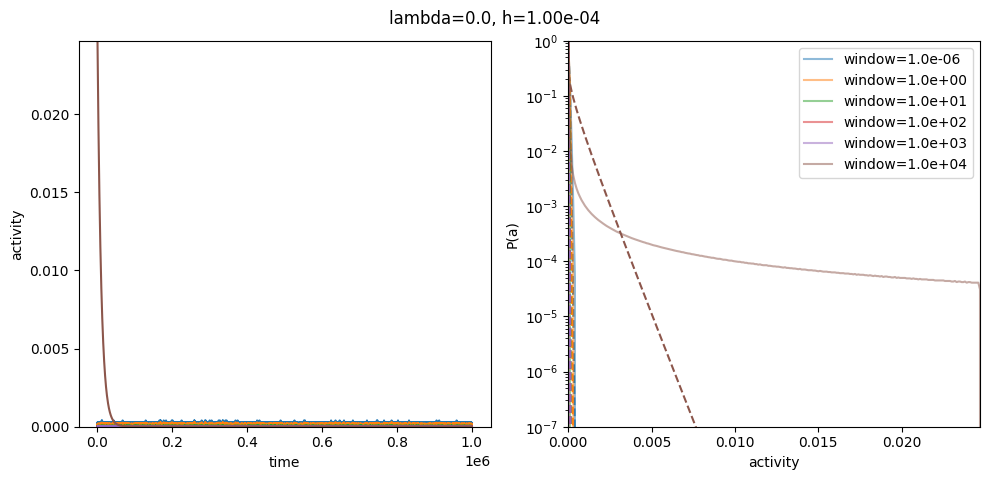

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	7.58e+00,6.06e+04,-0.0001,1.0002,0.00012511803547292287,2.514720000000001e-05
1.0	1.32e+01,1.06e+05,-0.0001,1.0002,0.00012511781323242463,2.5147213538343415e-05
10.0	4.68e+01,3.74e+05,-0.0001,1.0002,0.0001251179179569343,2.5147410040386578e-05
100.0	7.09e+01,5.66e+05,-0.0001,1.0002,0.00012511891342015095,2.5148405166325905e-05
1000.0	7.48e+01,5.98e+05,-0.0001,1.0002,0.00012511821834343994,2.5147709777293182e-05
10000.0	6.47e-01,1.73e+03,-0.0001,1.0002,0.00037354414708769203,0.00027221890043241517


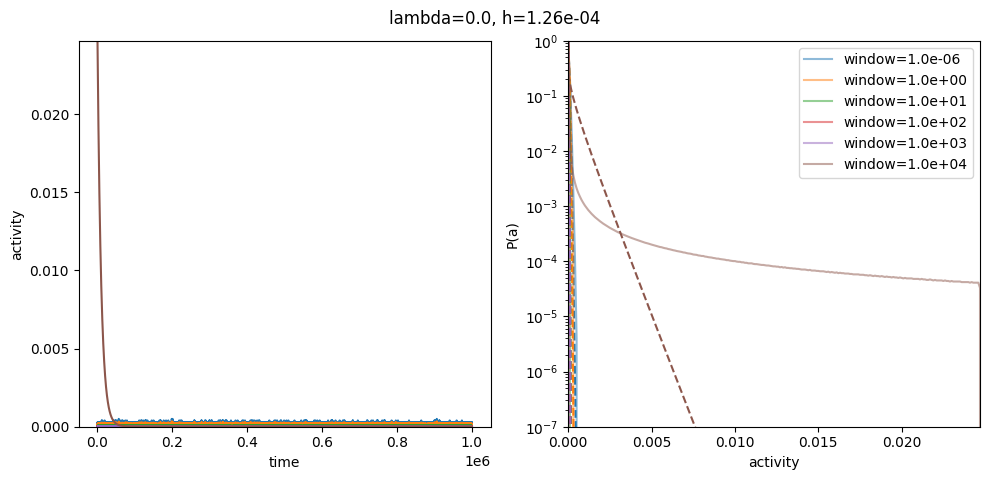

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	6.62e+00,5.03e+04,-0.0001,1.0002,0.0001316329801753054,3.166339999999999e-05
1.0	1.19e+01,9.02e+04,-0.0001,1.0002,0.0001316327361821078,3.1663427071871755e-05
10.0	4.72e+01,3.59e+05,-0.0001,1.0002,0.00013163290549072764,3.166370057661185e-05
100.0	7.74e+01,5.88e+05,-0.0001,1.0002,0.00013163386708501892,3.1664661657024574e-05
1000.0	8.28e+01,6.29e+05,-0.0001,1.0002,0.00013163245037701838,3.166324447259396e-05
10000.0	6.67e-01,1.75e+03,-0.0001,1.0002,0.0003800567343574287,0.0002787332878100894


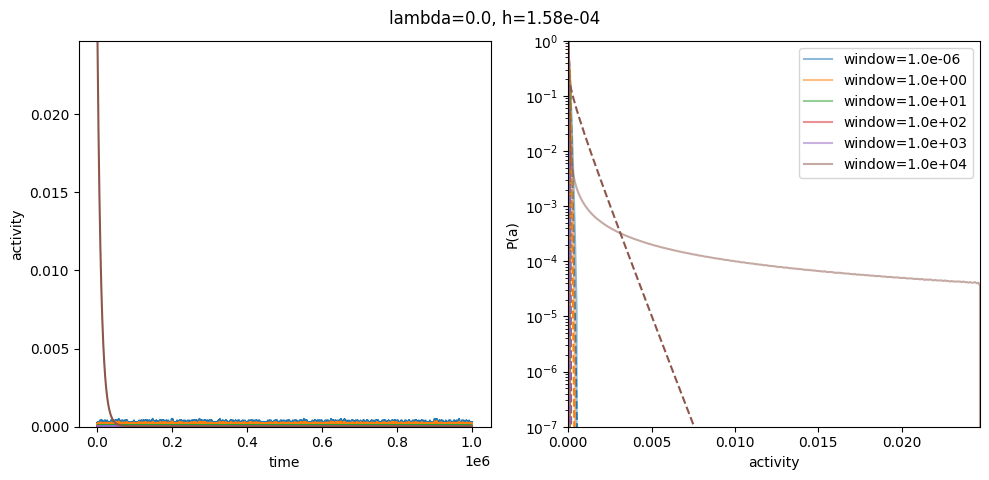

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	5.84e+00,4.18e+04,-0.0001,1.0002,0.00013981468652971563,3.984670000000002e-05
1.0	1.08e+01,7.70e+04,-0.0001,1.0002,0.00013981441087984944,3.984672707683481e-05
10.0	4.79e+01,3.43e+05,-0.0001,1.0002,0.00013981463292296007,3.984706431960093e-05
100.0	8.59e+01,6.15e+05,-0.0001,1.0002,0.0001398153602617144,3.9847790970423775e-05
1000.0	9.34e+01,6.68e+05,-0.0001,1.0002,0.00013981429553454436,3.984672580392064e-05
10000.0	6.91e-01,1.78e+03,-0.0001,1.0002,0.000388233315888767,0.0002869122535830924


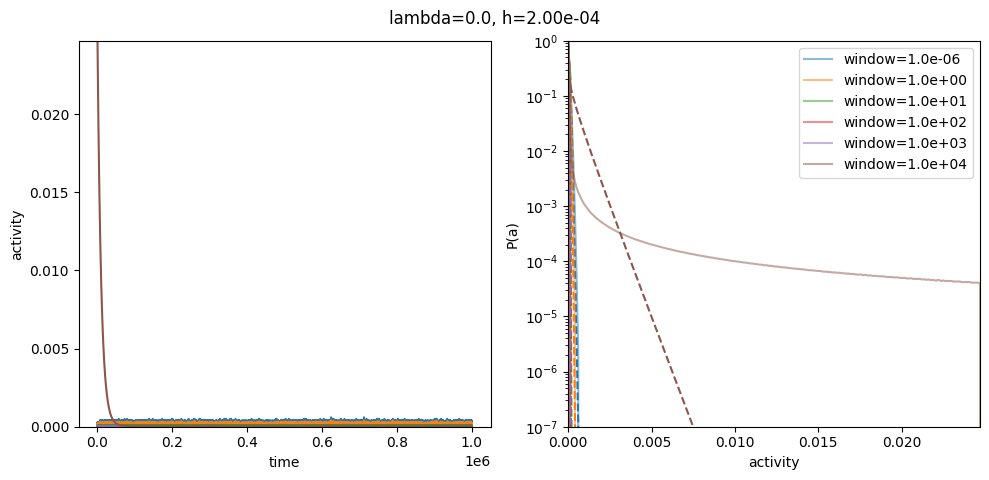

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	5.21e+00,3.47e+04,-0.0001,1.0002,0.0001501845399552157,5.0218600000000014e-05
1.0	9.90e+00,6.59e+04,-0.0001,1.0002,0.00015018425936865295,5.021864247477595e-05
10.0	4.91e+01,3.27e+05,-0.0001,1.0002,0.00015018459981700933,5.0219105191104994e-05
100.0	9.72e+01,6.47e+05,-0.0001,1.0002,0.00015018540633426333,5.021991087373263e-05
1000.0	1.08e+02,7.17e+05,-0.0001,1.0002,0.00015018615117846568,5.022065561831567e-05
10000.0	7.21e-01,1.81e+03,-0.0001,1.0002,0.00039859793749693327,0.00029728002275239895


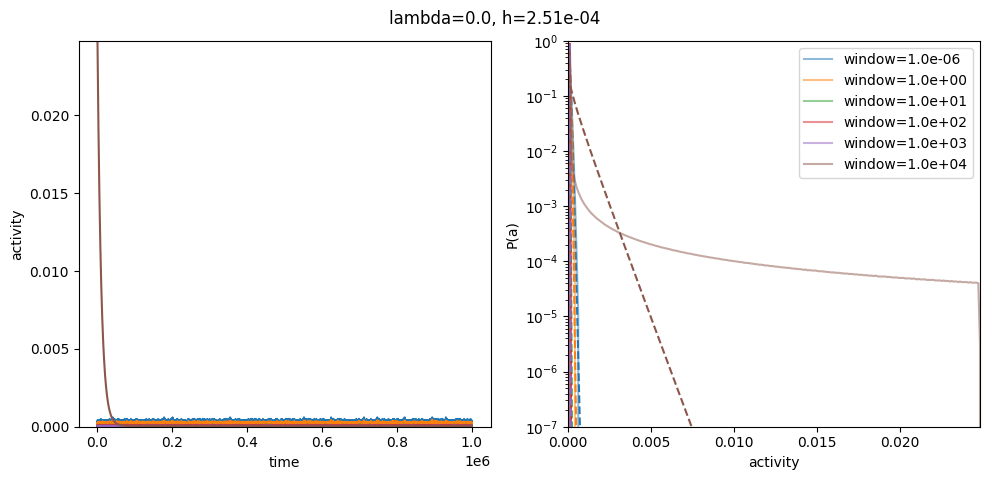

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	4.74e+00,2.90e+04,-0.0001,1.0002,0.00016314584938646403,6.31825e-05
1.0	9.26e+00,5.67e+04,-0.0001,1.0002,0.0001631455570804961,6.318253078518309e-05
10.0	5.07e+01,3.11e+05,-0.0001,1.0002,0.00016314596391488407,6.318306157390649e-05
100.0	1.12e+02,6.84e+05,-0.0001,1.0002,0.00016314682456102905,6.318392121997457e-05
1000.0	1.27e+02,7.78e+05,-0.0001,1.0002,0.00016314776849685127,6.318486506294867e-05
10000.0	7.60e-01,1.84e+03,-0.0001,1.0002,0.00041155582288428965,0.0003102419217895246


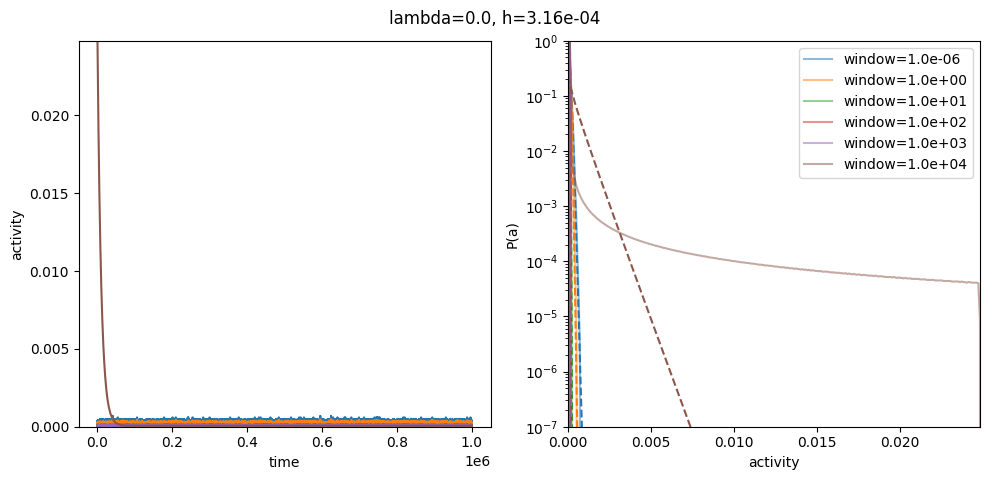

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	4.39e+00,2.45e+04,-0.0001,1.0002,0.00017947644329361086,7.951640000000003e-05
1.0	8.83e+00,4.92e+04,-0.0001,1.0002,0.00017947621133102587,7.951645793562681e-05
10.0	5.31e+01,2.96e+05,-0.0001,1.0002,0.0001794767951669957,7.951715915598303e-05
100.0	1.31e+02,7.29e+05,-0.0001,1.0002,0.0001794774043575685,7.95177669708313e-05
1000.0	1.54e+02,8.55e+05,-0.0001,1.0002,0.0001794786371632279,7.951899971452613e-05
10000.0	8.07e-01,1.89e+03,-0.0001,1.0002,0.0004278796877323471,0.00032657102846413323


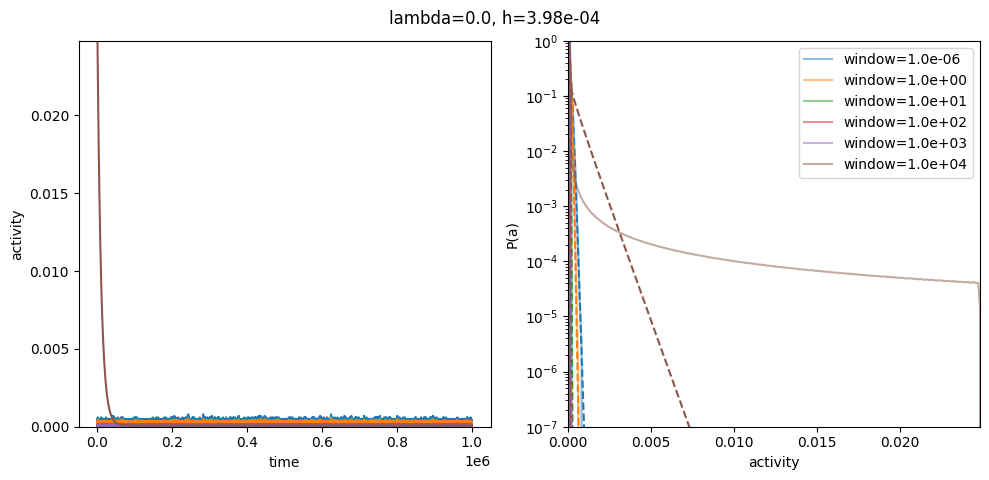

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	4.17e+00,2.08e+04,-0.0001,1.0002,0.0002000630196592284,0.00010010719999999998
1.0	8.63e+00,4.32e+04,-0.0001,1.0002,0.00020006288994091405,0.00010010727254535932
10.0	5.64e+01,2.82e+05,-0.0001,1.0002,0.00020006371064339198,0.0001001081920739146
100.0	1.56e+02,7.81e+05,-0.0001,1.0002,0.0002000647378515933,0.000100109217746111
1000.0	1.90e+02,9.50e+05,-0.0001,1.0002,0.00020006729144496038,0.00010011177155250105
10000.0	8.67e-01,1.93e+03,-0.0001,1.0002,0.0004484601513351082,0.00034715821955207473


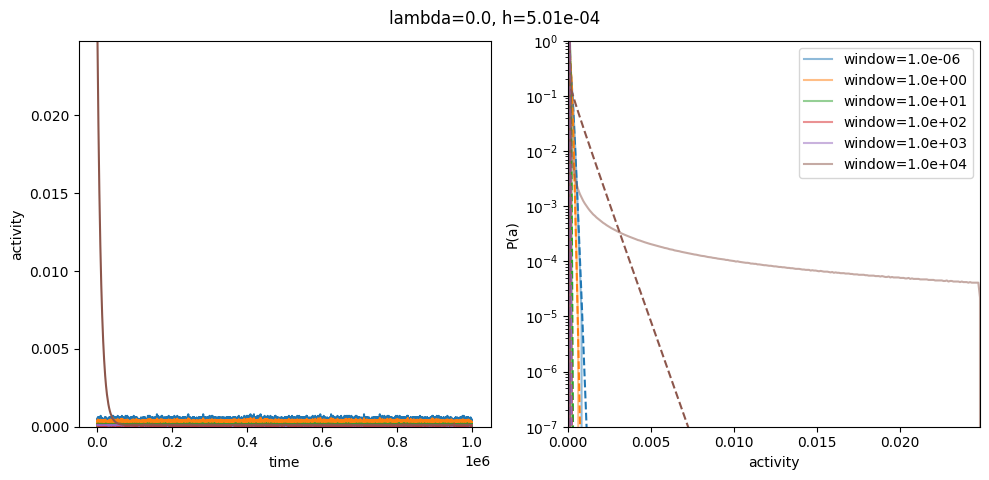

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	4.06e+00,1.80e+04,-0.0001,1.0002,0.00022603353568951894,0.00012608310000000007
1.0	8.67e+00,3.83e+04,-0.0001,1.0002,0.00022603356848759591,0.00012608317752491982
10.0	6.09e+01,2.69e+05,-0.0001,1.0002,0.00022603451179490082,0.00012608418755380262
100.0	1.90e+02,8.41e+05,-0.0001,1.0002,0.00022603621573042207,0.00012608588975752098
1000.0	2.41e+02,1.07e+06,-0.0001,1.0002,0.0002260373814023454,0.00012608705537601398
10000.0	9.42e-01,1.98e+03,-0.0001,1.0002,0.0004744099903325619,0.00037311680008262417


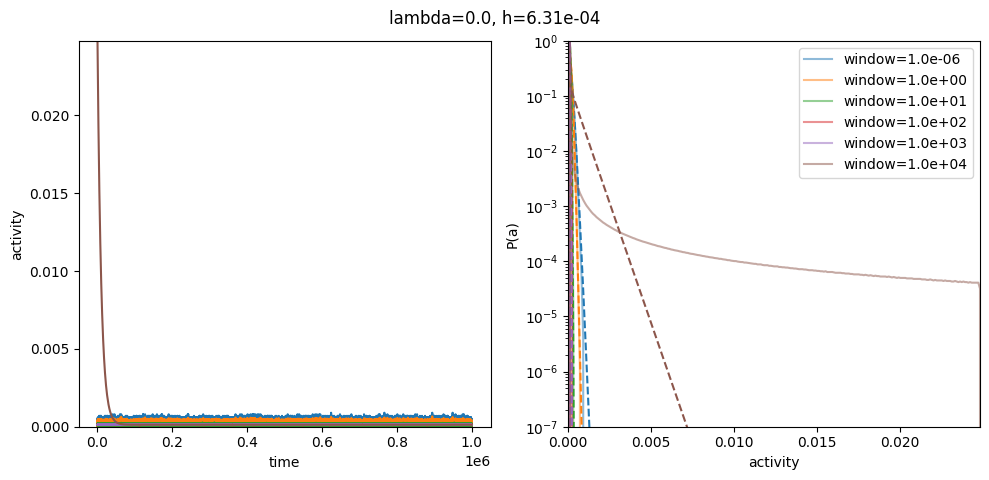

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	4.08e+00,1.58e+04,-0.0001,1.0002,0.0002586992144949047,0.0001587556
1.0	8.93e+00,3.45e+04,-0.0001,1.0002,0.00025869946855661976,0.00015875565362955408
10.0	6.67e+01,2.58e+05,-0.0001,1.0002,0.00025870037411579016,0.00015875658330896417
100.0	2.34e+02,9.06e+05,-0.0001,1.0002,0.0002587018667206094,0.0001587580737507938
1000.0	3.14e+02,1.21e+06,-0.0001,1.0002,0.0002587037991786476,0.00015876000629933115
10000.0	1.04e+00,2.04e+03,-0.0001,1.0002,0.0005070532792341443,0.00040577132210082857


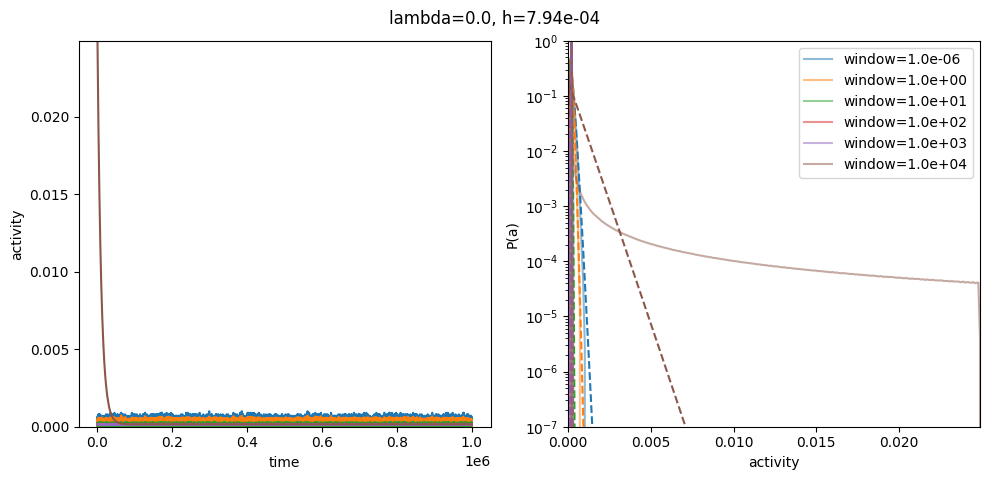

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	4.23e+00,1.41e+04,-0.0001,1.0002,0.00029999326375343535,0.00020005830000000005
1.0	9.47e+00,3.16e+04,-0.0001,1.0002,0.0002999938645956407,0.0002000583655481616
10.0	7.43e+01,2.48e+05,-0.0001,1.0002,0.0002999948737842929,0.00020005934197032008
100.0	2.95e+02,9.82e+05,-0.0001,1.0002,0.0002999961923505828,0.00020006065811300775
1000.0	4.19e+02,1.40e+06,-0.0001,1.0002,0.0002999959499205994,0.00020006041536264253
10000.0	1.16e+00,2.11e+03,-0.0001,1.0002,0.0005483114149077912,0.0004470439265601946


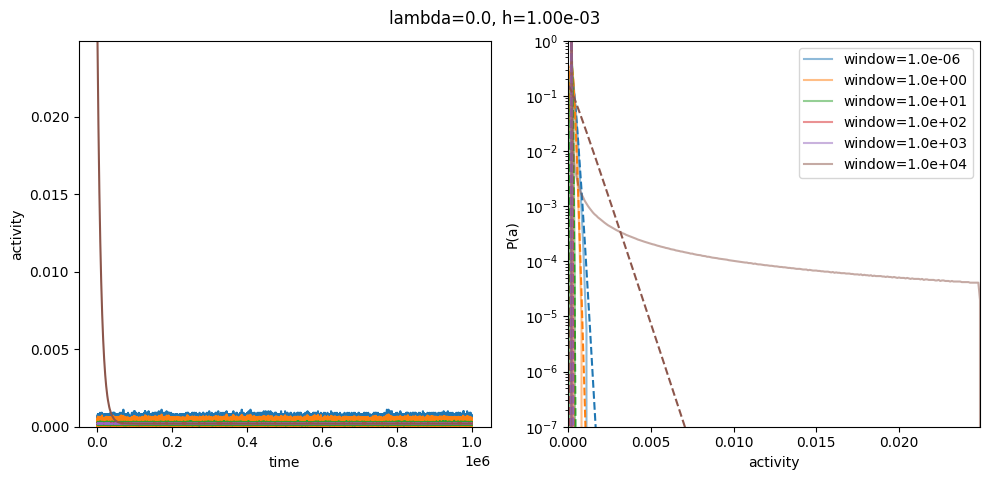

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	4.52e+00,1.28e+04,-0.0001,1.0002,0.000351634969148986,0.00025171079999999993
1.0	1.03e+01,2.93e+04,-0.0001,1.0002,0.00035163595438427966,0.00025171084629549136
10.0	8.38e+01,2.38e+05,-0.0001,1.0002,0.00035163680927014103,0.00025171160580803503
100.0	3.72e+02,1.06e+06,-0.0001,1.0002,0.00035163737597199444,0.0002517121698630992
1000.0	5.68e+02,1.61e+06,-0.0001,1.0002,0.0003516345511434189,0.00025170934421845785
10000.0	1.31e+00,2.18e+03,-0.0001,1.0002,0.0005999071977979934,0.0004986579620921906


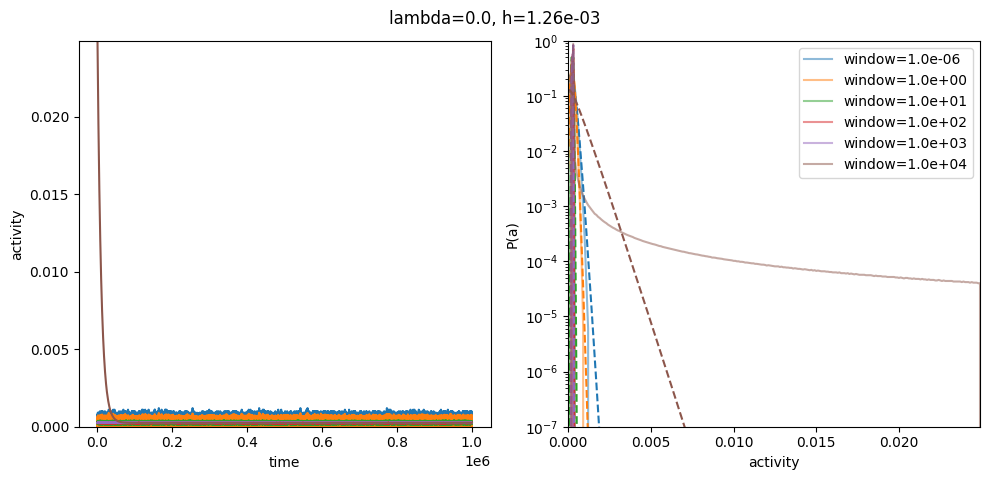

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	4.99e+00,1.20e+04,-0.0001,1.0002,0.00041669987230632296,0.00031678920000000006
1.0	1.15e+01,2.75e+04,-0.0001,1.0002,0.00041670127718172734,0.0003167892429367755
10.0	9.63e+01,2.31e+05,-0.0001,1.0002,0.00041670212351940973,0.0003167899332573862
100.0	4.75e+02,1.14e+06,-0.0001,1.0002,0.00041670118309990135,0.00031678898964952035
1000.0	7.86e+02,1.88e+06,-0.0001,1.0002,0.0004166935081541652,0.00031678131295478776
10000.0	1.50e+00,2.26e+03,-0.0001,1.0002,0.0006649194724060738,0.0005636932105788121


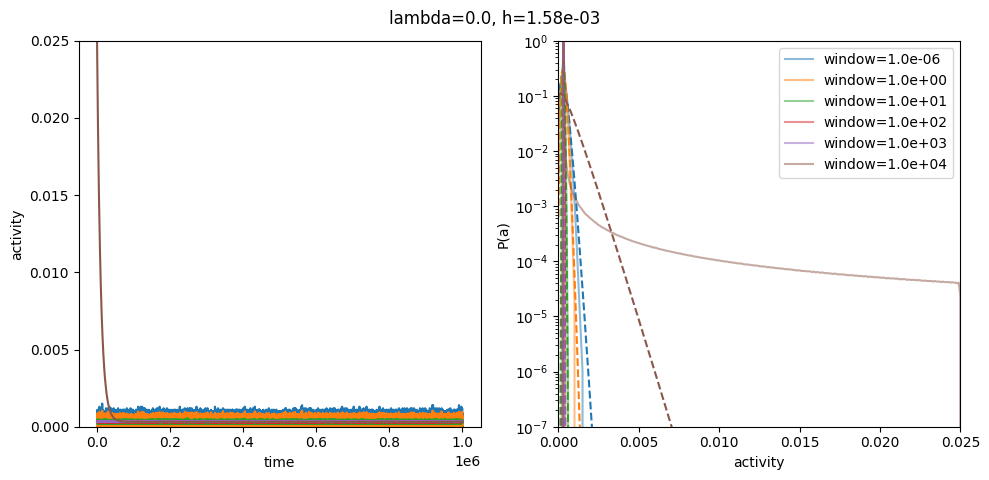

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	5.66e+00,1.14e+04,-0.0001,1.0002,0.0004985002498306163,0.00039860640000000016
1.0	1.31e+01,2.62e+04,-0.0001,1.0002,0.0004985020638325026,0.0003986064517562731
10.0	1.12e+02,2.26e+05,-0.0001,1.0002,0.0004985027698074424,0.00039860693998780143
100.0	6.11e+02,1.23e+06,-0.0001,1.0002,0.0004985025481153383,0.0003986067148758241
1000.0	1.10e+03,2.21e+06,-0.0001,1.0002,0.000498496262690673,0.0003986004279886061
10000.0	1.75e+00,2.34e+03,-0.0001,1.0002,0.0007466759585135573,0.0006454785934092769


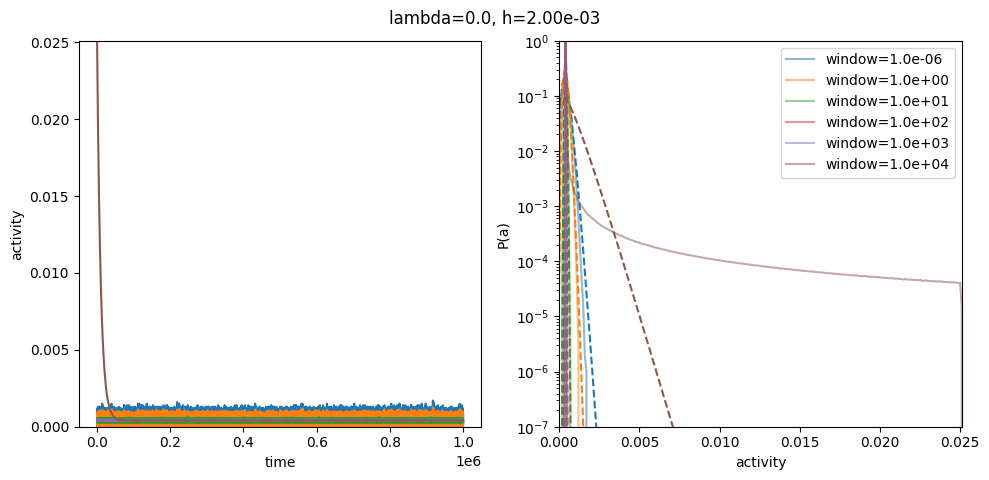

[1.e-06 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
1e-06	6.59e+00,1.09e+04,-0.0001,1.0002,0.000601624432296213,0.0005017516000000002
1.0	1.52e+01,2.52e+04,-0.0001,1.0002,0.0006016266058562348,0.0005017516773171234
10.0	1.33e+02,2.21e+05,-0.0001,1.0002,0.0006016274674601813,0.0005017522631769042
100.0	7.93e+02,1.32e+06,-0.0001,1.0002,0.0006016277995965841,0.0005017525914025173
1000.0	1.57e+03,2.61e+06,-0.0001,1.0002,0.0006016261327403858,0.0005017509239677097
10000.0	2.07e+00,2.43e+03,-0.0001,1.0002,0.0008497549973786767,0.0007485936286995586


KeyboardInterrupt: 

In [12]:
plot_flag=True
for (h,file) in zip(hs, filenames):
    filename = path+'/'+file

    # make figures for quality check
    if plot_flag:
        fig, axes = plt.subplots(1,2, figsize=(10,5))
        range_data = [1,0]

    # open hdf5 file
    with h5py.File(filename, 'r') as file:
        N = file.attrs['N']
        lambda_ = file.attrs['lambda']
        h=file.attrs['h']
        delta = 1/N
        support = np.linspace(0,1,N+1)
        if plot_flag:
            # set title in center of figure
            title_str = f'lambda={lambda_}, h={h:.2e}'
            fig.suptitle(title_str, y=.95)
        # windows
        windows = np.array(file['windows'])
        print(windows)
        for (i,window) in enumerate(windows):
            data = np.array(file['samples'][f'{window}'])
            if plot_flag:
                axes[0].plot(data)
                pmf_data = np.histogram(data, bins=np.append(support,1+delta)-delta/2, density=False)[0]/len(data)
                ref = axes[1].plot(support, pmf_data, label=f'window={windows[i]:.1e}', alpha=0.5)
            # fit beta distribution
            a,b,loc,scale = fit_beta_distribution(data, delta)
            # add result to hdf5 file; TODO: check if this is better done with a table maybe even in an sqllite database?
            with h5py.File(file_beta, 'a') as out:
                dset = f'{window}/{lambda_}/{h}'
                if dset in out:
                    del out[dset]
                out.create_dataset(dset, data=np.array([a,b,loc,scale, a/(a+b), np.mean(data)]))            

            print(f'{window}\t{a:.2e},{b:.2e},{loc},{scale},{a/(a+b)},{np.mean(data)}')


            if plot_flag:
                pmf_beta = stats.beta.pdf(support, a,b, loc=loc, scale=scale)
                pmf_beta = pmf_beta/np.sum(pmf_beta)
                axes[1].plot(support,pmf_beta, color=ref[0].get_color(), linestyle='--')
                range_data[0] = min(range_data[0], support[np.nonzero(pmf_data)][0])
                range_data[1] = max(range_data[1], support[np.nonzero(pmf_data)][-1])
    if plot_flag:
        axes[0].set_xlabel('time')
        axes[0].set_ylabel('activity')
        axes[1].set_xlabel('activity')
        axes[1].set_ylabel('P(a)')
        # set xrange to range of data
        axes[1].set_yscale('log')
        axes[1].set_ylim([1e-7,1])
        axes[1].set_xlim(range_data)
        axes[0].set_ylim(range_data)
        axes[1].legend()
        plt.tight_layout()
        plt.show()